In [74]:
import pandas as pd
import seaborn as sns
iris = sns.load_dataset('iris')
type(iris)
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [75]:
#to build function
#need to arrange by building id and meter
#need to set up chronological order in values

test = iris[['species','petal_width']].groupby(['species']).rolling(21,center=True,min_periods=1).sum()
test = test.rename(columns={'petal_width':'petal_width_rolling_sum'})

In [76]:
test = test.reset_index()
test

,species,level_1,petal_width_rolling_sum
0,setosa,0,2.4
1,setosa,1,2.6
2,setosa,2,2.7
3,setosa,3,2.8
4,setosa,4,3.0
...,...,...,...
145,virginica,145,32.1
146,virginica,146,29.8
147,virginica,147,27.4
148,virginica,148,25.6


In [77]:
iris['sum'] = test['petal_width_rolling_sum']
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sum
0,5.1,3.5,1.4,0.2,setosa,2.4
1,4.9,3.0,1.4,0.2,setosa,2.6
2,4.7,3.2,1.3,0.2,setosa,2.7
3,4.6,3.1,1.5,0.2,setosa,2.8
4,5.0,3.6,1.4,0.2,setosa,3.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,32.1
146,6.3,2.5,5.0,1.9,virginica,29.8
147,6.5,3.0,5.2,2.0,virginica,27.4
148,6.2,3.4,5.4,2.3,virginica,25.6


In [78]:
iris.to_csv("rolling_average.csv", index = True)

In [79]:
trainData = pd.read_csv("../kaggle-data/train.csv")
trainData.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [80]:
rolling_average = pd.read_csv("../kaggle-data/train.csv")
rolling_average.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


The code below correctly calculates the rolling average
Do I need group by or could I just use multi index with building_id and meter? (not worthing finding out)

In [81]:
rolling_average['meter_reading_roll_avg'] = rolling_average['meter_reading']
rolling_average.set_index('timestamp',inplace=True)

rolling_average = rolling_average[['building_id','meter','meter_reading_roll_avg']].groupby(['building_id','meter']).rolling(21,center=True,min_periods=1).mean()
rolling_average

building_id  meter  \
building_id meter timestamp                                 
0           0     2016-01-01 00:00:00          0.0    0.0   
                  2016-01-01 01:00:00          0.0    0.0   
                  2016-01-01 02:00:00          0.0    0.0   
                  2016-01-01 03:00:00          0.0    0.0   
                  2016-01-01 04:00:00          0.0    0.0   
...                                            ...    ...   
1448        0     2016-12-31 19:00:00       1448.0    0.0   
                  2016-12-31 20:00:00       1448.0    0.0   
                  2016-12-31 21:00:00       1448.0    0.0   
                  2016-12-31 22:00:00       1448.0    0.0   
                  2016-12-31 23:00:00       1448.0    0.0   

                                       meter_reading_roll_avg  
building_id meter timestamp                                    
0           0     2016-01-01 00:00:00                0.000000  
                  2016-01-01 01:00:00                0.000000  
                  2016-01-01 02:00:00                0.000000  
                  2016-01-01 03:00:00                0.000000  
                  2016-01-01 04:00:00                0.000000  
...                                                       ...  
1448        0     2016-12-31 19:00:00                3.240000  
                  2016-12-31 20:00:00                3.244643  
                  2016-12-31 21:00:00                3.186538  
                  2016-12-31 22:00:00                3.143750  
                  2016-12-31 23:00:00                3.113636  

[20216100 rows x 3 columns]

In [82]:
trainData

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [83]:
rolling_average.drop(columns=['building_id','meter'], inplace=True)
rolling_average.tail(20)

meter_reading_roll_avg
building_id meter timestamp                                  
1448        0     2016-12-31 04:00:00                3.477381
                  2016-12-31 05:00:00                3.413095
                  2016-12-31 06:00:00                3.394048
                  2016-12-31 07:00:00                3.435714
                  2016-12-31 08:00:00                3.447619
                  2016-12-31 09:00:00                3.408333
                  2016-12-31 10:00:00                3.378571
                  2016-12-31 11:00:00                3.353571
                  2016-12-31 12:00:00                3.329762
                  2016-12-31 13:00:00                3.310714
                  2016-12-31 14:00:00                3.305000
                  2016-12-31 15:00:00                3.280263
                  2016-12-31 16:00:00                3.245833
                  2016-12-31 17:00:00                3.220588
                  2016-12-31 18:00:00                3.235937
                  2016-12-31 19:00:00                3.240000
                  2016-12-31 20:00:00                3.244643
                  2016-12-31 21:00:00                3.186538
                  2016-12-31 22:00:00                3.143750
                  2016-12-31 23:00:00                3.113636

In [84]:
trainData[(trainData['building_id']==1448) & (trainData['meter']==0)].tail(20).mean()

building_id      1448.000
meter               0.000
meter_reading       3.305
dtype: float64

Next step, merge meter_reading and meter_reading average

In [85]:
rolling_average.reset_index()

,building_id,meter,timestamp,meter_reading_roll_avg
0,0,0,2016-01-01 00:00:00,0.000000
1,0,0,2016-01-01 01:00:00,0.000000
2,0,0,2016-01-01 02:00:00,0.000000
3,0,0,2016-01-01 03:00:00,0.000000
4,0,0,2016-01-01 04:00:00,0.000000
...,...,...,...,...
20216095,1448,0,2016-12-31 19:00:00,3.240000
20216096,1448,0,2016-12-31 20:00:00,3.244643
20216097,1448,0,2016-12-31 21:00:00,3.186538
20216098,1448,0,2016-12-31 22:00:00,3.143750


In [86]:
trainData

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [87]:
trainData = pd.merge(trainData,rolling_average, on=['building_id','meter','timestamp'], how='inner')
trainData.tail(20)

,building_id,meter,timestamp,meter_reading,meter_reading_roll_avg
20216080,1434,0,2016-12-31 23:00:00,70.7250,73.277273
20216081,1434,2,2016-12-31 23:00:00,259.0730,271.558636
20216082,1435,0,2016-12-31 23:00:00,4.7250,5.175000
20216083,1436,0,2016-12-31 23:00:00,11.6000,13.250000
20216084,1436,2,2016-12-31 23:00:00,1274.6600,1532.225455
20216085,1437,0,2016-12-31 23:00:00,195.9250,504.531818
20216086,1437,2,2016-12-31 23:00:00,1518.9200,1647.152727
20216087,1438,0,2016-12-31 23:00:00,100.6750,106.695455
20216088,1438,2,2016-12-31 23:00:00,852.7700,939.896182
20216089,1439,0,2016-12-31 23:00:00,167.4000,177.950000


In [88]:
trainData['outlier_ratio'] = trainData['meter_reading'] / trainData['meter_reading_roll_avg']
trainData

,building_id,meter,timestamp,meter_reading,meter_reading_roll_avg,outlier_ratio
0,0,0,2016-01-01 00:00:00,0.000,0.000000,NaN
1,1,0,2016-01-01 00:00:00,0.000,0.000000,NaN
2,2,0,2016-01-01 00:00:00,0.000,0.000000,NaN
3,3,0,2016-01-01 00:00:00,0.000,0.000000,NaN
4,4,0,2016-01-01 00:00:00,0.000,0.000000,NaN
...,...,...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750,7.563636,1.156851
20216096,1445,0,2016-12-31 23:00:00,4.825,5.672727,0.850561
20216097,1446,0,2016-12-31 23:00:00,0.000,0.100000,0.000000
20216098,1447,0,2016-12-31 23:00:00,159.575,158.854545,1.004535


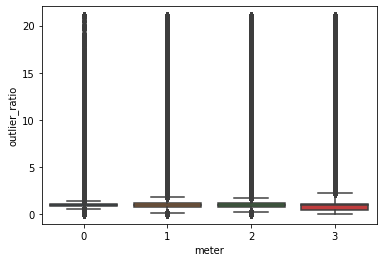

In [89]:
sns.boxplot(x='meter', y='outlier_ratio', data=trainData)

In [90]:
trainData.describe()

,building_id,meter,meter_reading,meter_reading_roll_avg,outlier_ratio
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,1.930776e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03,2.117161e+03,9.683197e-01
std,4.269133e+02,9.309921e-01,1.532356e+05,1.494921e+05,5.633926e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01,2.215000e+01,8.397952e-01
50%,8.950000e+02,0.000000e+00,7.877500e+01,8.528571e+01,9.910147e-01
75%,1.179000e+03,1.000000e+00,2.679840e+02,2.765870e+02,1.106650e+00
max,1.448000e+03,3.000000e+00,2.190470e+07,1.959542e+07,2.100000e+01
